## Plain vs Vectorized Matrix-Matrix Multiplication in Python ##

In [1]:
import torch
import random
random.seed(737)

In [35]:
print(torch.cuda.is_available())

True


### Plain Python Matrix-Matrix Function ###

In [33]:
def plain_matrix_matrix_multiply(X, W, b):
    outputs = []
    for x in X:
        outputv = []
        for w in W:
            output = b
            for x_j, w_j in zip(x, w):
                output += x_j * w_j
            outputv.append(output)
        outputs.append(outputv)
    return outputs

### Run the Tests ###

In [64]:
plain_times = []
torch_times = []

for i in range(10):
    print("m = " + str((i + 1) * 10))
    b = 0.
    X = [[random.random() for _ in range((i + 1) * 10)]for _ in range(110)]
    W = [[random.random() for _ in range(90)]for _ in range((i + 1) * 10)]

    time = %timeit -o plain_matrix_matrix_multiply(X, W, b)
    plain_times.append( time )

    t_b = torch.tensor(b)
    t_X = torch.tensor(X)
    t_W = torch.tensor(W)

    time = %timeit -o torch.matmul(t_X, t_W) + t_b
    torch_times.append( time )

m = 10
552 μs ± 5.89 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
10.8 μs ± 170 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
m = 20
1.83 ms ± 13 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.9 μs ± 711 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
m = 30
5.57 ms ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
20.9 μs ± 306 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
m = 40
12.1 ms ± 216 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
22.8 μs ± 336 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
m = 50
18.1 ms ± 119 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
23.4 μs ± 676 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
m = 60
25.7 ms ± 245 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
24.9 μs ± 377 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
m = 70
34.5 ms ± 633 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
26.8 μs 

### Results ###

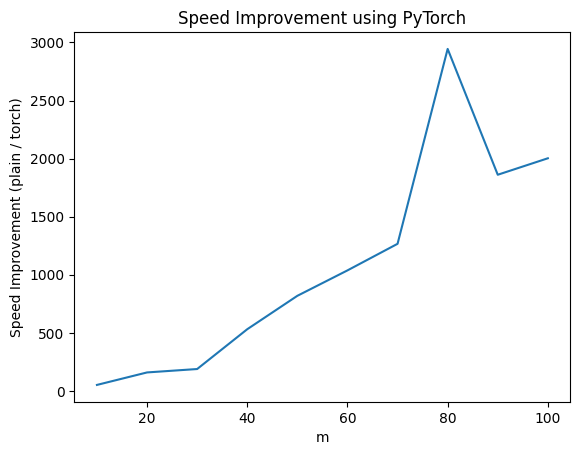

In [65]:
import matplotlib.pyplot as plt

plain_times = [time.best for time in plain_times]
torch_times = [time.best for time in torch_times]

speed_improvement = [plain / torch for plain, torch in zip(plain_times, torch_times)]

plt.plot(range(10, 110, 10), speed_improvement)
plt.xlabel('m')
plt.ylabel('Speed Improvement (plain / torch)')
plt.title('Speed Improvement using PyTorch')
plt.show()